# Building GFW-climate widgets based on The API

This is a notebook to demonstrate creation of new GFW-climate widgets


In [2]:
import requests
from pprint import pprint

### What's in a dataset?

The API contains endpoints for `datasets`, `fields`, and `query`.

To see the dataset contents we can use the `datasets` endpoint with the ID of a dataset

In [4]:
url = "https://staging-api.globalforestwatch.org/v1/"
r = requests.get(url + 'dataset/e5149c98-c31d-4f7e-95eb-654993031348')
print(f'Status code: {r.status_code}')
pprint(r.json())

Status code: 200
{'data': {'attributes': {'application': ['gfw'],
                         'attributesPath': None,
                         'blockchain': {},
                         'clonedHost': {},
                         'connectorType': 'document',
                         'connectorUrl': 'http://gfw2-data.s3.amazonaws.com/alerts-tsv/output2017/20180607/to-api/adm2.json',
                         'dataLastUpdated': None,
                         'dataPath': 'data',
                         'env': 'production',
                         'errorMessage': '',
                         'geoInfo': False,
                         'layerRelevantProps': [],
                         'legend': {'country': [],
                                    'date': [],
                                    'nested': ['year_data'],
                                    'region': []},
                         'mainDateField': None,
                         'name': 'country page data for admin level 2',
        

### Dataset fields

We can retrieve the fields of a dataset with the `fields` endpoint:

In [3]:
url = "https://staging-api.globalforestwatch.org/v1/"
r = requests.get(url + 'fields/e5149c98-c31d-4f7e-95eb-654993031348')
print(f'Status code: {r.status_code}')
pprint(r.json())

Status code: 200
{'fields': {'adm1': {'type': 'long'},
            'adm2': {'type': 'long'},
            'area_admin': {'type': 'float'},
            'area_extent': {'type': 'float'},
            'area_extent_2000': {'type': 'float'},
            'area_gain': {'type': 'float'},
            'area_poly_aoi': {'type': 'float'},
            'bound1': {'fields': {'keyword': {'ignore_above': 256,
                                              'type': 'keyword'}},
                       'type': 'text'},
            'bound2': {'fields': {'keyword': {'ignore_above': 256,
                                              'type': 'keyword'}},
                       'type': 'text'},
            'bound3': {'type': 'long'},
            'bound4': {'type': 'long'},
            'iso': {'fields': {'keyword': {'ignore_above': 256,
                                           'type': 'keyword'}},
                    'type': 'text'},
            'polyname': {'fields': {'keyword': {'ignore_above': 256,
           

## Query

Based on the fields present we can make simple queries, which should be all necessary to build widgets from these data. The query is passed as a query paramater as follows:

In [5]:
url = "https://staging-api.globalforestwatch.org/v1/"
query = """SELECT * from e5149c98-c31d-4f7e-95eb-654993031348 LIMIT 3"""
r = requests.get(url + 'query/', params={'sql': query})

print(r.url)
print(f'Status code: {r.status_code}')
pprint(r.json())

https://staging-api.globalforestwatch.org/v1/query/?sql=SELECT+%2A+from+e5149c98-c31d-4f7e-95eb-654993031348+LIMIT+3
Status code: 200
{'data': [{'_id': 'AWYgGkrqpffdUZnPO15j',
           'adm1': 15,
           'adm2': 15,
           'area_admin': 154119.377982,
           'area_extent': 879.112353783,
           'area_extent_2000': 446.21320991199997,
           'area_gain': 2.7729741115099995,
           'area_poly_aoi': 33577.3302243,
           'bound1': -9999,
           'bound2': -9999,
           'bound3': -9999,
           'bound4': -9999,
           'iso': 'PRY',
           'polyname': 'kba',
           'thresh': 50,
           'year_data': [{'area_loss': 0.138552748516,
                          'emissions': 15.1022495882,
                          'year': 2001},
                         {'area_loss': 0, 'emissions': 0, 'year': 2002},
                         {'area_loss': 0, 'emissions': 0, 'year': 2003},
                         {'area_loss': 0, 'emissions': 0, 'year': 2004}

The requests can use many features of SQL

In [6]:
url = "https://staging-api.globalforestwatch.org/v1/"
query = """SELECT COUNT(area), AVG(area), SUM(area) from e5149c98-c31d-4f7e-95eb-654993031348 WHERE iso = 'PER' and thresh > 74"""
r = requests.get(url + 'query/', params={'sql': query})

print(r.url)
print(f'Status code: {r.status_code}')
pprint(r.json())

https://staging-api.globalforestwatch.org/v1/query/?sql=SELECT+COUNT%28area%29%2C+AVG%28area%29%2C+SUM%28area%29+from+e5149c98-c31d-4f7e-95eb-654993031348+WHERE+iso+%3D+%27PER%27+and+thresh+%3E+74
Status code: 200
{'data': [{'AVG(area)': None, 'COUNT(area)': 0, 'SUM(area)': 0}],
 'meta': {'cloneUrl': {'body': {'dataset': {'application': ['your', 'apps'],
                                            'datasetUrl': '/v1/query/e5149c98-c31d-4f7e-95eb-654993031348'}},
                       'http_method': 'POST',
                       'url': '/v1/dataset/e5149c98-c31d-4f7e-95eb-654993031348/clone'}}}


## Pie chart: Emissions in plantations vs natural forests 

**Admin**

In [33]:
url = "https://staging-api.globalforestwatch.org/v1/"
query = """SELECT polyname, year_data.year as year, SUM(year_data.area_loss) as area, SUM(year_data.emissions) as emissions from e5149c98-c31d-4f7e-95eb-654993031348 WHERE iso = 'BRA' AND adm1 = 12 AND adm2 = 114 AND polyname = 'admin' AND thresh= 25
GROUP BY  bound1, polyname, iso, nested(year_data.year)"""
r = requests.get(url + 'query/', params={'sql': query})

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_admin = r.json()

https://staging-api.globalforestwatch.org/v1/query/?sql=SELECT+polyname%2C+year_data.year+as+year%2C+SUM%28year_data.area_loss%29+as+area%2C+SUM%28year_data.emissions%29+as+emissions+from+e5149c98-c31d-4f7e-95eb-654993031348+WHERE+iso+%3D+%27BRA%27+AND+adm1+%3D+12+AND+adm2+%3D+114+AND+polyname+%3D+%27admin%27+AND+thresh%3D+25%0AGROUP+BY++bound1%2C+polyname%2C+iso%2C+nested%28year_data.year%29
Status code: 200


**Plantations**

In [35]:
url = "https://staging-api.globalforestwatch.org/v1/"
query = """SELECT polyname, year_data.year as year, SUM(year_data.area_loss) as area, SUM(year_data.emissions) as emissions from e5149c98-c31d-4f7e-95eb-654993031348 WHERE iso = 'BRA' AND adm1 = 12 AND adm2 = 114 AND polyname = 'plantations' AND thresh= 25
GROUP BY polyname, iso, nested(year_data.year)"""
r = requests.get(url + 'query/', params={'sql': query})

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_plantations = r.json()

https://staging-api.globalforestwatch.org/v1/query/?sql=SELECT+polyname%2C+year_data.year+as+year%2C+SUM%28year_data.area_loss%29+as+area%2C+SUM%28year_data.emissions%29+as+emissions+from+e5149c98-c31d-4f7e-95eb-654993031348+WHERE+iso+%3D+%27BRA%27+AND+adm1+%3D+12+AND+adm2+%3D+114+AND+polyname+%3D+%27plantations%27+AND+thresh%3D+25%0AGROUP+BY+polyname%2C+iso%2C+nested%28year_data.year%29
Status code: 200


### Build up a donut plot

Use the previous queries to create a donut plot showing CO2 emissions of Natural forest and Plantations.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Get data

In [48]:
admin = data_admin.get('data')
plantations= data_plantations.get('data')

Filter by year

In [122]:
start_yr = 2013
stop_yr = 2017

admin_filter =list(filter(lambda admin: (admin['year'] >= start_yr) & (admin['year'] <= stop_yr), admin))
plantations_filter =list(filter(lambda plantations: (plantations['year'] >= start_yr) & (plantations['year'] <= stop_yr), plantations))

SUM emissions

In [123]:
admin_emissions = 0
plantations_emissions = 0
for n in range(len(admin_filter)):
    admin_emissions += admin_filter[n].get('emissions')
    if plantations_filter[n].get('emissions'):
        plantations_emissions += plantations_filter[n].get('emissions')

Donut plot

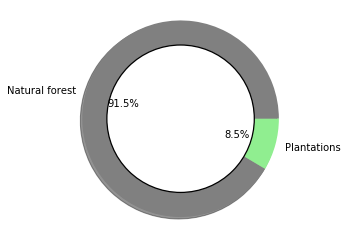

In [124]:
# Donut plot
labels = 'Natural forest', 'Plantations'
sizes = [admin_emissions, plantations_emissions]
colors = ['grey', 'lightgreen', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()  

**Dynamic sentence example**

In [141]:
plantations_per = '{:.1f}'.format(plantations_emissions/(admin_emissions + plantations_emissions)*100)
admin_emissions = '{:.1f}'.format(admin_emissions)

In [142]:
f"From {start_yr} to {stop_yr}, {plantations_per}% of tree cover loss in São Pedro da Cipa occurred within plantations. The total loss within natural forest was equivalent to {admin_emissions}t of CO2 emissions."

'From 2013 to 2017, 8.5% of tree cover loss in São Pedro da Cipa occurred within plantations. The total loss within natural forest was equivalent to 61550.0t of CO2 emissions.'

## Future Carbon Gains widget

Add a version of the [Potential tree biomass gain widget](http://bit.ly/2PaZ8q2) to the GFW country page climate tab

### Queries

**Young Secondary Forest**

Tg C over 40 years

http://climate.globalforestwatch.org/api/indicators/3110?thresh=0&iso=BRA&id_1=&area=

In [184]:
url = "http://climate.globalforestwatch.org/api/indicators/"
query = "3110?thresh=0&iso=BRA&id_1=&area="
r = requests.get(url+query)

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_YSF_g = r.json()

http://climate.globalforestwatch.org/api/indicators/3110?thresh=0&iso=BRA&id_1=&area=
Status code: 200


Mt CO2 per year

http://climate.globalforestwatch.org/api/indicators/3114?thresh=0&iso=BRA&id_1=&area=

In [209]:
url = "http://climate.globalforestwatch.org/api/indicators/"
query = "3114?thresh=0&iso=BRA&id_1=&area="
r = requests.get(url+query)

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_YSF_t = r.json()

http://climate.globalforestwatch.org/api/indicators/3114?thresh=0&iso=BRA&id_1=&area=
Status code: 200


**Mid-Age Secondary Forests**

Tg C over 40 years

http://climate.globalforestwatch.org/api/indicators/3111?thresh=0&iso=BRA&id_1=&area=

In [207]:
url = "http://climate.globalforestwatch.org/api/indicators/"
query = "3111?thresh=0&iso=BRA&id_1=&area="
r = requests.get(url+query)

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_MESF_g = r.json()

http://climate.globalforestwatch.org/api/indicators/3111?thresh=0&iso=BRA&id_1=&area=
Status code: 200


Mt CO2 per year

http://climate.globalforestwatch.org/api/indicators/3115?thresh=0&iso=BRA&id_1=&area=

In [208]:
url = "http://climate.globalforestwatch.org/api/indicators/"
query = "3115?thresh=0&iso=BRA&id_1=&area="
r = requests.get(url+query)

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_MESF_t = r.json()

http://climate.globalforestwatch.org/api/indicators/3115?thresh=0&iso=BRA&id_1=&area=
Status code: 200


**Pasture Area**

Tg C over 40 years

http://climate.globalforestwatch.org/api/indicators/3112?thresh=0&iso=BRA&id_1=&area=

In [188]:
url = "http://climate.globalforestwatch.org/api/indicators/"
query = "3112?thresh=0&iso=BRA&id_1=&area="
r = requests.get(url+query)

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_PA_g = r.json()

http://climate.globalforestwatch.org/api/indicators/3112?thresh=0&iso=BRA&id_1=&area=
Status code: 200


Mt CO2 per year

http://climate.globalforestwatch.org/api/indicators/3116?thresh=0&iso=BRA&id_1=&area=

In [189]:
url = "http://climate.globalforestwatch.org/api/indicators/"
query = "3116?thresh=0&iso=BRA&id_1=&area="
r = requests.get(url+query)

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_PA_t = r.json()

http://climate.globalforestwatch.org/api/indicators/3116?thresh=0&iso=BRA&id_1=&area=
Status code: 200


**Crops**

Tg C over 40 years

http://climate.globalforestwatch.org/api/indicators/3113?thresh=0&iso=BRA&id_1=&area=

In [190]:
url = "http://climate.globalforestwatch.org/api/indicators/"
query = "3113?thresh=0&iso=BRA&id_1=&area="
r = requests.get(url+query)

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_C_g = r.json()

http://climate.globalforestwatch.org/api/indicators/3113?thresh=0&iso=BRA&id_1=&area=
Status code: 200


Mt CO2 per year

http://climate.globalforestwatch.org/api/indicators/3117?thresh=0&iso=BRA&id_1=&area=

In [191]:
url = "http://climate.globalforestwatch.org/api/indicators/"
query = "3117?thresh=0&iso=BRA&id_1=&area="
r = requests.get(url+query)

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data_C_t = r.json()

http://climate.globalforestwatch.org/api/indicators/3117?thresh=0&iso=BRA&id_1=&area=
Status code: 200


### Build up a stacked bar chart

Use the previous queries to create a stacked bar chart showing Potential tree biomass gain of Young Secondary Forests, Mid-Age Secondary Forests, Pasture Area, and Crops.

In [4]:
import numpy as np

Get data values

In [211]:
YSF_g = data_YSF_g.get('values')
MESF_g = data_MESF_g.get('values')
PA_g = data_PA_g.get('values')
C_g = data_C_g.get('values')

YSF_t = data_YSF_t.get('values')
MESF_t = data_MESF_t.get('values')
PA_t = data_PA_t.get('values')
C_t = data_C_t.get('values')

In [212]:
years = []

YSF_values_t = []
MESF_values_t = []
PA_values_t = []
C_values_t = []

YSF_values_g = []
MESF_values_g = []
PA_values_g = []
C_values_g = []
for n in range(len(YSF_t)):
    years.append(YSF_t[n].get('year'))
    
    YSF_values_t.append(YSF_t[n].get('value'))
    MESF_values_t.append(MESF_t[n].get('value'))
    PA_values_t.append(PA_t[n].get('value'))
    C_values_t.append(C_t[n].get('value'))
    
    YSF_values_g.append(YSF_g[n].get('value'))
    MESF_values_g.append(MESF_g[n].get('value'))
    PA_values_g.append(PA_g[n].get('value'))
    C_values_g.append(C_g[n].get('value'))

Stacked bar charts

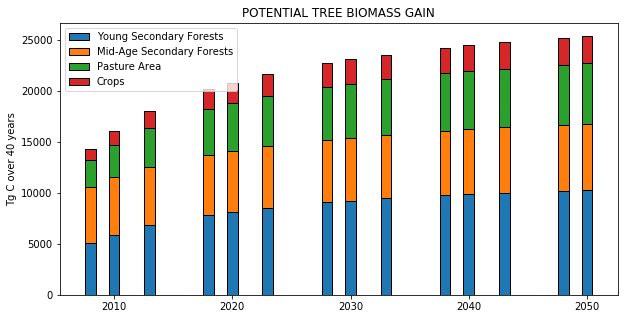

In [213]:
# Data
values = [YSF_values_g, MESF_values_g, PA_values_g, C_values_g]
categories = ['Young Secondary Forests', 'Mid-Age Secondary Forests', 'Pasture Area', 'Crops']
years = years    # the x locations for the groups

# Plot
plt.figure(figsize=(10,5))

width = 0.9       # the width of the bars

for i in range(len(values)):
    if i == 0:
        plt.bar(years, values[i], width, label=categories[i], edgecolor ='k')
        past_values = np.array(values[i])
    else:
        plt.bar(years, values[i], width, bottom=past_values, label=categories[i], edgecolor ='k')
        past_values = np.array(values[i]) + past_values

plt.title('POTENTIAL TREE BIOMASS GAIN')
plt.ylabel('Tg C over 40 years')
plt.legend()

plt.show()

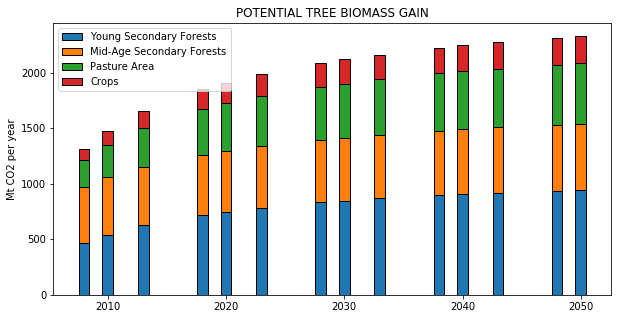

In [214]:
# Data
values = [YSF_values_t, MESF_values_t, PA_values_t, C_values_t]
categories = ['Young Secondary Forests', 'Mid-Age Secondary Forests', 'Pasture Area', 'Crops']
years = years    # the x locations for the groups

# Plot
plt.figure(figsize=(10,5))

width = 0.9       # the width of the bars

for i in range(len(values)):
    if i == 0:
        plt.bar(years, values[i], width, label=categories[i], edgecolor ='k')
        past_values = np.array(values[i])
    else:
        plt.bar(years, values[i], width, bottom=past_values, label=categories[i], edgecolor ='k')
        past_values = np.array(values[i]) + past_values

plt.title('POTENTIAL TREE BIOMASS GAIN')
plt.ylabel('Mt CO2 per year')
plt.legend()

plt.show()

## Monitor progress in near real-time

Weekly forest disturbance alerts to [track forest loss and emissions](http://climate.globalforestwatch.org/insights/glad-alerts/BRA)

### Query

In [14]:
url = "https://production-api.globalforestwatch.org/v1/"
query = """SELECT sum(alerts) AS alerts, sum(cumulative_emissions) AS cumulative_emissions, sum(above_ground_carbon_loss) AS above_ground_carbon_loss, sum(percent_to_emissions_target) AS percent_to_emissions_target, sum(percent_to_deforestation_target) AS percent_to_deforestation_target, sum(loss_ha) AS loss, sum(cumulative_deforestation) AS cumulative_deforestation, year as year, country_iso, week FROM a98197d2-cd8e-4b17-ab5c-fabf54b25ea0 WHERE  country_iso ='BRA' AND year IN ('2017') AND week <= 53 GROUP BY week, country_iso ORDER BY week ASC"""
r = requests.get(url + 'query/', params={'sql': query})

print(r.url)
print(f'Status code: {r.status_code}')
#pprint(r.json())
data = r.json()

https://production-api.globalforestwatch.org/v1/query/?sql=SELECT+sum%28alerts%29+AS+alerts%2C+sum%28cumulative_emissions%29+AS+cumulative_emissions%2C+sum%28above_ground_carbon_loss%29+AS+above_ground_carbon_loss%2C+sum%28percent_to_emissions_target%29+AS+percent_to_emissions_target%2C+sum%28percent_to_deforestation_target%29+AS+percent_to_deforestation_target%2C+sum%28loss_ha%29+AS+loss%2C+sum%28cumulative_deforestation%29+AS+cumulative_deforestation%2C+year+as+year%2C+country_iso%2C+week+FROM+a98197d2-cd8e-4b17-ab5c-fabf54b25ea0+WHERE++country_iso+%3D%27BRA%27+AND+year+IN+%28%272017%27%29+AND+week+%3C%3D+53+GROUP+BY+week%2C+country_iso+ORDER+BY+week+ASC
Status code: 200


### Build up a line chart

Use the previous query to create a line chart showing Cumulative emissions and area of loss.

Get data values

In [16]:
data = data.get('data')

In [19]:
emissions = []
loss = []
weeks = []
for n in range(len(data)):
    emissions.append(data[n].get('cumulative_emissions'))
    loss.append(data[n].get('cumulative_deforestation'))
    weeks.append(data[n].get('week'))

Line charts

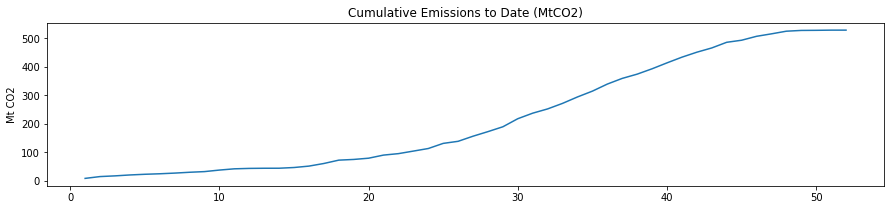

In [25]:
# Plot
plt.figure(figsize=(15,3))

plt.plot(weeks, emissions)

plt.title('Cumulative Emissions to Date (MtCO2)')
plt.ylabel('Mt CO2')

plt.show()

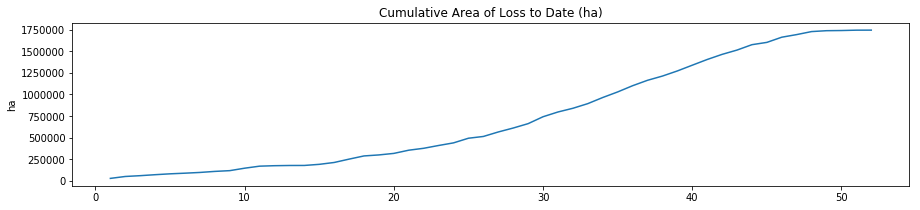

In [27]:
# Plot
plt.figure(figsize=(15,3))

plt.plot(weeks, loss)

plt.title('Cumulative Area of Loss to Date (ha)')
plt.ylabel('ha')

plt.show()